# Python Project - Marvel Mart Project
## Khoa Phan
## 3/15/2021

### Import Statements

In [ ]:
import numpy as np 
import pandas as pd
from pandas import DataFrame, Series


import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks', palette ='Set2')
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)



## Part 1: Cleaning the data

In [ ]:
# Read MM_sales.csv into slOri.
# Copies the data into a separate dataframe slClean.

slOri = pd.read_csv('MM_sales.csv')
slClean = slOri.copy()

### A. Country   (either missing OR will be a number as a string)

In [ ]:
# Try to convert each item in Country into a float, if it succeeds, converts it into NULL.
# If it returns an error, checks whether it's missing (NULL), printing out the value if true.

print("Testing for incorrect/missing data in Country")
count = 0
for index, row in slClean.iterrows():
    try:
        row.loc['Country'] = float(row.loc['Country'])
        slClean.loc[int(index), 'Country'] = 'NULL'
        print(slClean.loc[int(index), 'Country'])
        count+=1
    except:
        if row.loc['Country'] == 'NULL':
            print(slClean.loc[int(index), 'Country'])
            count+=1
            
print(f"Number of incorrect/missing data: {count}")

### B. Item Type   (either missing OR won't be a valid Item Type from the other ones listed)

In [4]:
# Try to convert each item in Item Type into a float, , if it succeeds, converts it into NULL.
# If it returns an error, checks whether it's missing (NULL), 
# printing out the value if true.

print("Testing for incorrect/missing data in Item Type")
count = 0
for index, row in slClean.iterrows():
    try:
        row.loc['Item Type'] = float(row.loc['Item Type'])
        slClean.loc[int(index), 'Item Type'] = 'NULL'
        print(slClean.loc[int(index), 'Item Type'])
        count+=1
    except:
        if row.loc['Item Type'] == 'NULL':
            print(slClean.loc[int(index), 'Item Type'])
            count+=1
            
print(f"Number of incorrect/missing data: {count}")

Testing for incorrect/missing data in Item Type
NULL
NULL
NULL
NULL
NULL
NULL
Number of incorrect/missing data: 6


### Order Priority   (either missing OR won't be a valid priority code of 'C', 'H', 'M', 'L', or 'NULL')

In [5]:
# Try to convert each item in Order Priority into a float, , if it succeeds, converts it into NULL.
# If it returns an error, checks whether if it's missing or if it's not a valid priority code,
# changing it to NULL and printing it out if true.

print("Testing for incorrect/missing data in Order Priority")
count = 0
for index, row in slClean.iterrows():
    try:
        row.loc['Order Priority'] = float(row.loc['Order Priority'])
        slClean.loc[int(index), 'Order Priority'] = 'NULL'
        print(slClean.loc[int(index), 'Order Priority'])
        count+=1
    except:
        val = ['C','H','M','L','NULL']
        if row.loc['Order Priority'] not in val:
            slClean.loc[int(index), 'Order Priority'] = "NULL"
            print(slClean.loc[int(index), 'Order Priority'])
            count+=1

print(f"Number of incorrect/missing data: {count}")

Testing for incorrect/missing data in Order Priority
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
Number of incorrect/missing data: 15


### Order ID   (either missing OR won't be a number)

In [6]:
# Try to convert each item in Order Priority into an int.
# If it returns an error, print out the incorrect data, and then change it it to 0.

print("Testing for incorrect/missing data in Order ID")
count = 0
for index, row in slClean.iterrows():
    try:
        row.loc['Order ID'] = int(row.loc['Order ID'])
    except:
        print(row.loc['Order ID'])
        # replace it with 0 (number types replace with 0)
        slClean.loc[int(index),'Order ID'] = 0
        count+=1
        
print(f"Number of incorrect/missing data: {count}")

Testing for incorrect/missing data in Order ID
Cosmetics
Fruits
Snacks
Meat
Snacks
Number of incorrect/missing data: 5


### Removing all the incorrect or missing values and writing to a new CSV file

In [7]:
# Converts all the spaces in the columns names into underscores.
# Removes all the incorrect/ missing value.

slClean.columns = slClean.columns.str.replace(' ','_')

slClean = slClean[slClean.Country != "NULL"]
slClean = slClean[slClean.Item_Type != "NULL"]
slClean = slClean[slClean.Order_Priority != "NULL"]
slClean = slClean[slClean.Order_ID != 0]


In [8]:
# Writing to a new CSV file.

slClean.to_csv('MM_Sales_clean.csv')

## Part 2: Exploratory Data Analysis with Reports & Visualizations

#### Importing the clean data from Part 1

In [9]:
# Read the new, clean csv file.

sClean = pd.read_csv('MM_Sales_clean.csv')

## Question 1

In [10]:
# Create the new variable q1 based on the required data.
# Group q1 by the count of the values.
# Sort q1 in descending order, keeping only the top 10 results.

q1 = sClean['Country']
q1 = q1.groupby(q1.values).count()
q1 = q1.sort_values(ascending= False).head(10)

print(f"Top 10 transactions by Country:\n\n{q1}")


Top 10 transactions by Country:

Trinidad and Tobago                 321
Guinea                              318
Cape Verde                          314
Maldives                            311
Finland                             310
Democratic Republic of the Congo    308
Samoa                               306
Malta                               305
China                               303
South Sudan                         302
Name: Country, dtype: int64


### 1. Use Seaborn or Matplotlib to create a chart of your choice showing these top 10 values by country

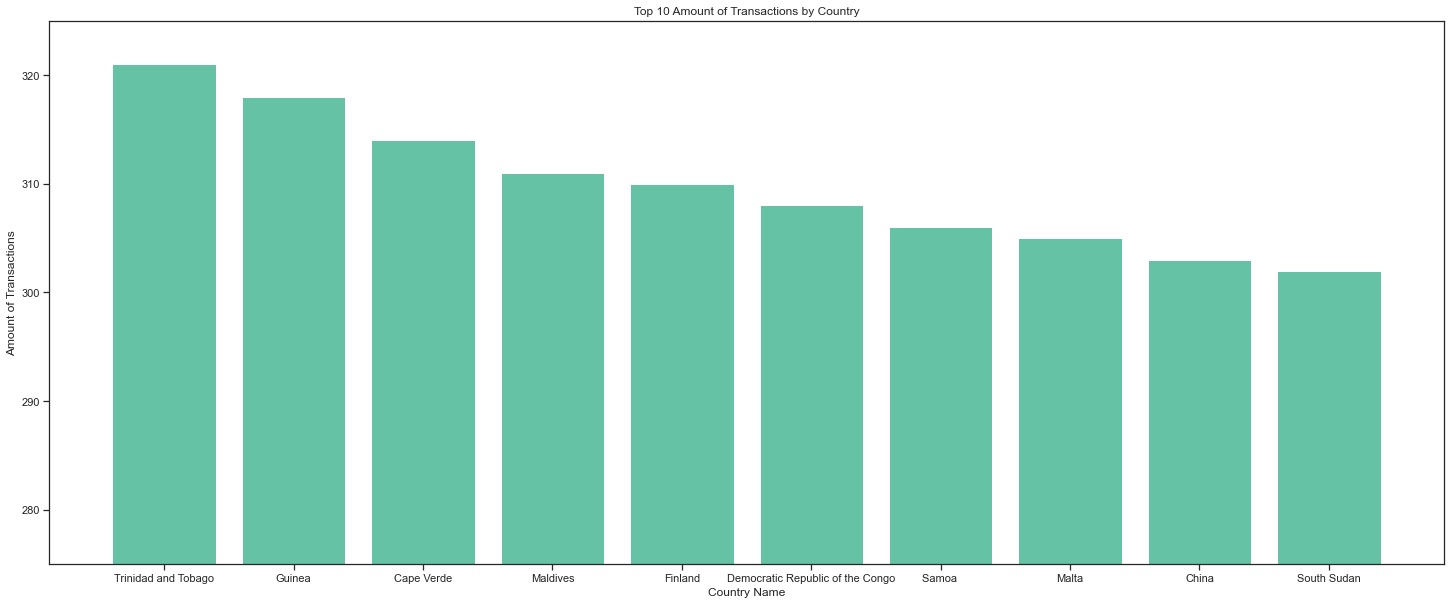

In [11]:
# Create a chart that shows the top 10 amount of transactions by country.

fig, ax = plt.subplots()
fig.set_size_inches(25,10)
ax.ticklabel_format(useOffset=False, style='plain')
plt.title('Top 10 Amount of Transactions by Country')
plt.xlabel('Country Name')
plt.ylabel('Amount of Transactions')
ax.bar(q1.index,q1.values)
ax.set(ylim=[275, 325])
plt.show()

### 2. Write the results to a text file called MM_Rankings.txt.

In [12]:
# Write the results into a new text file.

with open("MM_Rankings.txt", "w+") as writer:
    writer.write("Countries Most Sale Transactions: \n")
    for index, row in q1.items():
        writer.write(f"{index}: {row} \n")
    writer.write("The country we should build our shipping center is Cape Verde because it has the 3rd highest number of transactions,\nbut no shipping center (unlike Trinidad and Tobago, Guinea, and Maldives) \n")

## Question 2

### 1. Determine the count for how many online and offline orders we take.

In [13]:
# Create a new variable q2Saleschannel based on the required data.
# Group q2Saleschannel by the count of the values.

q2Saleschannel = sClean['Sales_Channel']
q2Saleschannel = q2Saleschannel.groupby(q2Saleschannel.values).count()

print(f"Count of online and offline orders we take:\n\n{q2Saleschannel}")

Count of online and offline orders we take:

Offline    19788
Online     30183
Name: Sales_Channel, dtype: int64


### 2. Determine the count of the different Order Priority types.

In [14]:
# Create a new variable q2Orderpriority based on the required data.
# Group q2Orderpriority by the count of the values.

q2Orderpriority = sClean['Order_Priority']
q2Orderpriority = q2Orderpriority.groupby(q2Orderpriority.values).count()

print(f"Count of the different Order Priority Types:\n\n{q2Orderpriority}")

Count of the different Order Priority Types:

C     5012
H    15094
L     9984
M    19881
Name: Order_Priority, dtype: int64


### 3. Create a pie chart for each showing the differences in values

#### Sales Channel pie chart

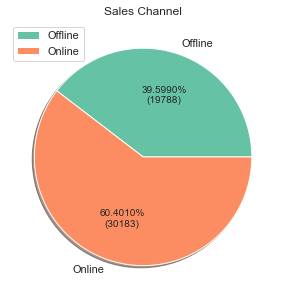

In [15]:
# Create a pie chart for Sales channel.

def my_fmt(x):
    return '{:.4f}%\n({:.0f})'.format(x, totalSales*x/100)

totalSales = q2Saleschannel.sum(axis=0)
fig, ax = plt.subplots()
fig.set_size_inches(5,5)
plt.title("Sales Channel")
ax.ticklabel_format(useOffset=False, style='plain')
ax.pie(q2Saleschannel, labels = q2Saleschannel.index, shadow=True, autopct=my_fmt)
plt.legend(loc=2)
plt.show()

#### Order Priority pie chart

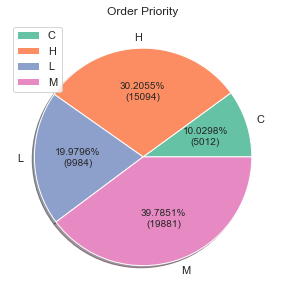

In [16]:
# Create a pie chart for Order Priority.

def my_fmt2(x):
    return '{:.4f}%\n({:.0f})'.format(x, totalPriority*x/100)

totalPriority = q2Orderpriority.sum(axis=0)
fig, ax = plt.subplots()
fig.set_size_inches(5,5)
plt.title("Order Priority")
ax.ticklabel_format(useOffset=False, style='plain')
ax.pie(q2Orderpriority, labels = q2Orderpriority.index, shadow=True, autopct=my_fmt2)
plt.legend(loc=2)
plt.show()

### 4. Add the results of the highest sales channel type and the highest order priority to the file MM_Rankings.txt.

In [17]:
# Define a function that write strings based on the variable inputted.
# Append the results into the file MM_Rankings.txt.

def easywrite(x,y,z):
    writer.write("\n")
    writer.write(f"{y}: \n")
    for index, row in x.items():
        writer.write(f"{index}: {row} \n")
    writer.write(f"We do more {x.index.max()} {z}.\n ")
    
with open("MM_Rankings.txt", "a+") as writer:
    easywrite(q2Saleschannel,"Sales Channels","sales")
    easywrite(q2Orderpriority,"Order Priority","order priorities")
    writer.write("\n")

## Question 3 

### 1. Create a Boxplot using Seaborn showing the Total Profits DISTRIBUTION by Item Type.

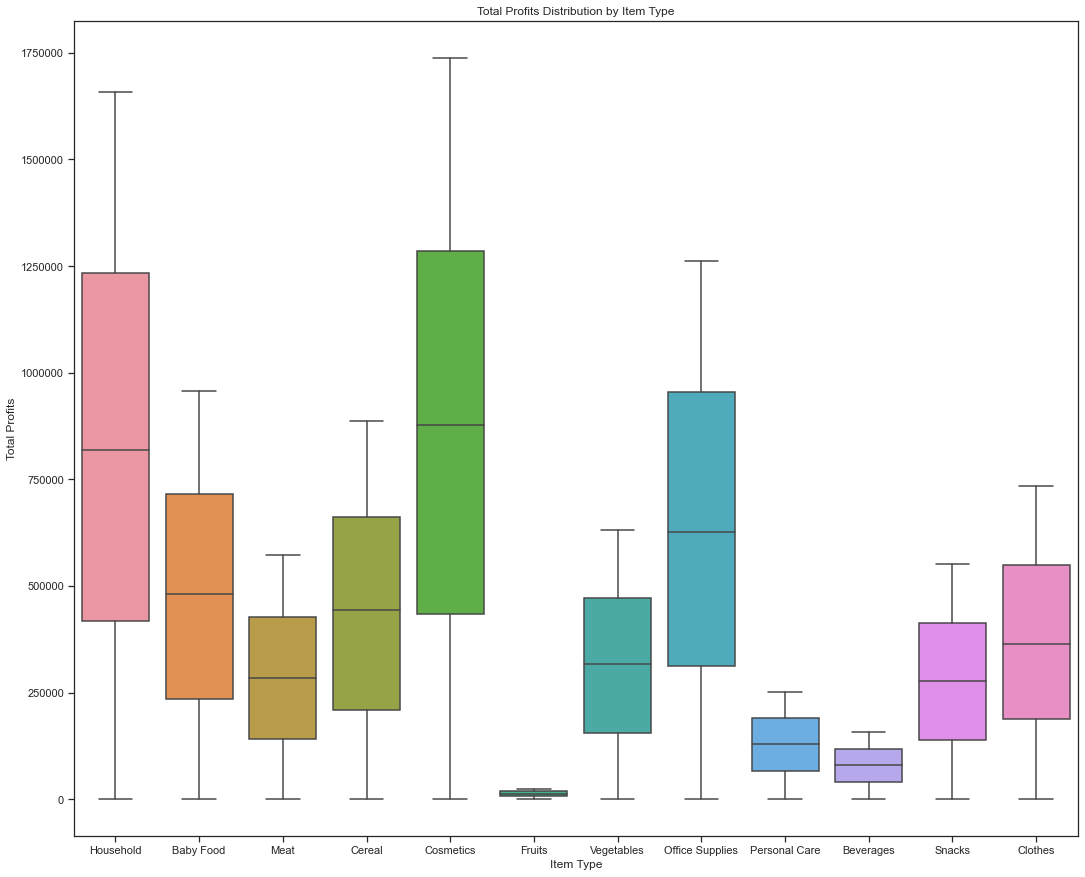

In [18]:
# Create a boxplot for Total Profits Distribution by Item Type.

fig, ax = plt.subplots()
fig.set_size_inches(18,15)
ax.ticklabel_format(useOffset=False, style='plain')
sns.boxplot(sClean.Item_Type, sClean.Total_Profit)
plt.title('Total Profits Distribution by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Total Profits')
plt.show()


### 2. Use Python to determine the sum of Total Profit by Item Type.

In [19]:
# Create a new variable q3 based on the required data.
# Group q3 by the sum of the values.

q3 = sClean[['Item_Type','Total_Profit']]
q3 = q3.groupby(['Item_Type']).sum()

print(f"Sum of Total Profit by Item Type:\n\n{q3}")


Sum of Total Profit by Item Type:

                  Total_Profit
Item_Type                     
Baby Food       1942865748.120
Beverages        327559249.080
Cereal          1824726412.290
Clothes         1520832019.680
Cosmetics       3638407966.750
Fruits            51010570.920
Household       3401180998.060
Meat            1196342404.400
Office Supplies 2605440187.500
Personal Care    535250525.600
Snacks          1149715758.720
Vegetables      1322639660.240


### 3. Now create a chart type of your choice (Seaborn or Matplotlib) showing the sums of the different Item Types.

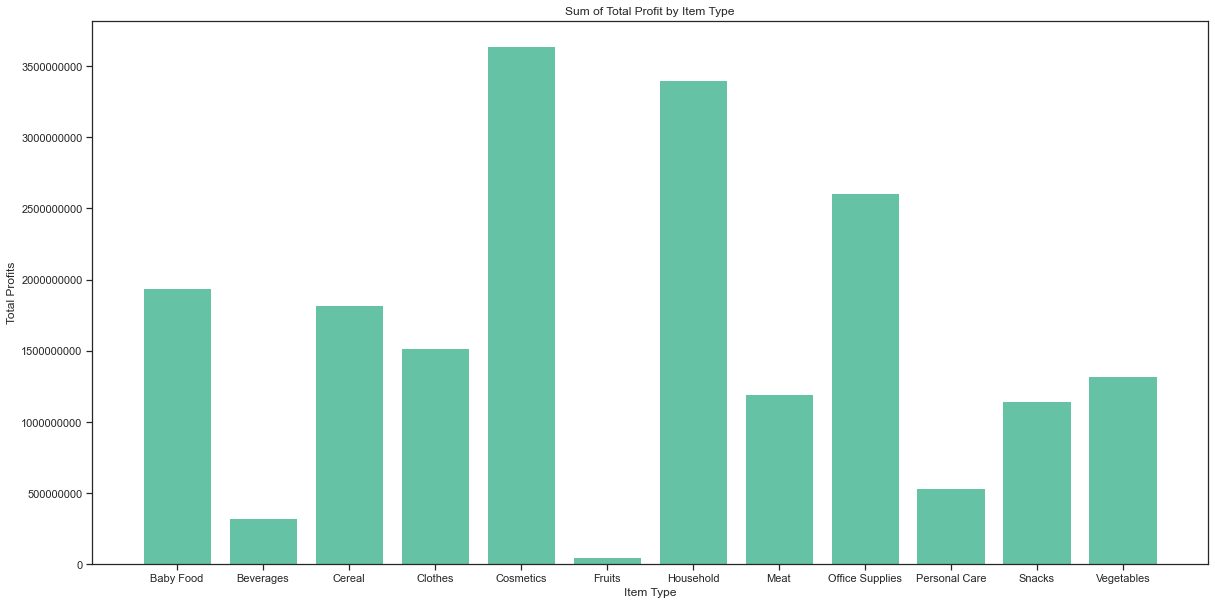

In [20]:
# Create a bar chart for sum of Total Profit by Item Type.

fig, ax = plt.subplots()
fig.set_size_inches(20,10)
ax.ticklabel_format(useOffset=False, style='plain')
plt.title('Sum of Total Profit by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Total Profits')
ax.bar(q3.index, q3['Total_Profit'].values)
plt.show()


### 4. Using Python, rank the top 3 item types we did the most sales (brought in most profit) in to the least sales

In [21]:
# Sort q3 in descending order, keeping only the top 10 results and assign it into q3rank.

q3rank = q3.sort_values(by=['Total_Profit'],ascending = False).head(3)

print(f'Top 3 Item Types with the most profit:\n\n{q3rank}')

Top 3 Item Types with the most profit:

                  Total_Profit
Item_Type                     
Cosmetics       3638407966.750
Household       3401180998.060
Office Supplies 2605440187.500


### 5. Add the results of the top 3 item types to the file MM_Rankings.txt.

In [22]:
# Append the results into the file MM_Rankings.txt 

with open("MM_Rankings.txt", "a+") as writer:
    writer.write("Highest Selling Items: \n")
    for index, row in q3rank.iterrows():
        writer.write(f"{row.name}: {row.loc['Total_Profit']} \n")
    writer.write(f"We profited from {q3rank.index[0]} sales the most.\n ")
    writer.write("\n")

### 6. Provide a markdown section discussing the results of the boxplots

From the boxplot we can see there are three boxes that are larger than the others: Household, Cosmetics, and Office Supplies. All of them have a very large spread, but they also have very high medians, consistently higher than all the other categories. This means that on average, these item types bring us more profits compared to all the other item types on the list. From a business perspective, it makes sense that we should put our focus on these items, and find more ways to promote and sell them.


On the other hand, fruits bring us the least profits. We should find a way to make fruits more profitable, but if it's not possible, we should stop selling them and remove them from our catalog and warehouses, in order to make more space for more profitable items, such as Cosmetics.

The result from the boxplots mostly make sense. Cosmetic items are highly sought after, as well as Household items and Office Supplies. Other types such as Baby Food don't bring as much profits, but they look acceptable. The only two item types that look odd are Fruits and Beverages. People who buy vegetables usually want to eat healthy, so it would make sense that they also purchase fruits alongside their vegetables. People who buy Snacks would also like to purchase drinks and beverages, since they go well together. At the very least, I expect Fruits and Beverages to be on the same level of profits as Vegetables and Snacks. Either people shopping at Marvel Mart have an aversion to Fruits/Beverages, or that the selection of items within the item type is poor or unappealing.

## Question 4

### 1. Produce the data above for the sum of the requested columns.

In [23]:
# Create a new variable stats based on the required data.
# Calculate the sum of the columns from stats and assign it to sumStats.

stats = sClean[['Units_Sold','Unit_Cost','Total_Revenue','Total_Cost','Total_Profit']]
sumStats = stats.sum()
print(f"Sum of the requirested columns:\n\n{sumStats}")

Sum of the requirested columns:

Units_Sold        249818150.000
Unit_Cost           9360768.320
Total_Revenue   66145004417.170
Total_Cost      46629032915.810
Total_Profit    19515971501.360
dtype: float64


### 2. Produce the data above for the average of the requested columns. (Average Units Sold, Average Cost, etc)

In [24]:
# Calculate the mean of the columns from stats and assign it to sumStats.

meanStats = stats.mean()
print(f"Mean of the requirested columns:\n\n{meanStats}")

Mean of the requirested columns:

Units_Sold         4999.263
Unit_Cost           187.324
Total_Revenue   1323667.816
Total_Cost       933121.869
Total_Profit     390545.947
dtype: float64


### 3. Produce the data above for the maximum of the requested columns. (Max Units Sold, Max Cost, etc.)

In [25]:
# Calculate the maximum of the columns from stats and assign it to sumStats.

maxStats = stats.max()
print(f"Max of the requirested columns:\n\n{maxStats}")

Max of the requirested columns:

Units_Sold        10000.000
Unit_Cost           524.960
Total_Revenue   6682031.730
Total_Cost      5249075.040
Total_Profit    1738178.390
dtype: float64


### 4. Create two line plots using Seaborn or Matplotlib, one for the sums and one for both the averages and the maximums.

#### Line plots for sum

In [26]:
# Create a function that converts the underscores in the index of the variable inputted
# into empty space.

def toSpace(x):
    x.index = x.index.str.replace('_',' ')
    
toSpace(sumStats)
toSpace(meanStats)
toSpace(maxStats)

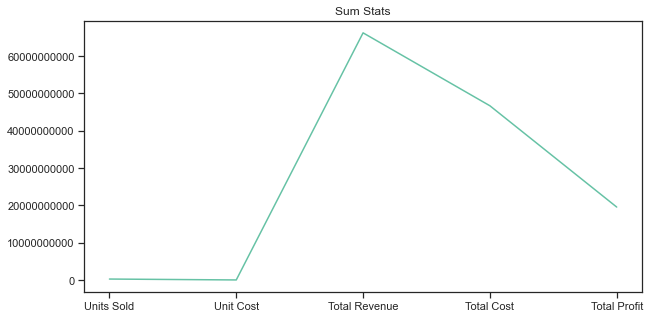

In [27]:
# Create a line plot for the sums.

fig, ax = plt.subplots()
fig.set_size_inches(10,5)
plt.title('Sum Stats')
ax.ticklabel_format(useOffset=False, style='plain')
ax.plot(sumStats)
plt.show()

#### Line plots for both the average and the maximums

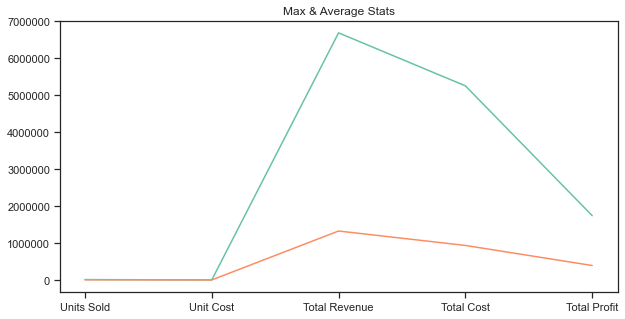

In [28]:
# Create a lineplot for both the average and the maximums.

fig, ax = plt.subplots()
fig.set_size_inches(10,5)
ax.ticklabel_format(useOffset=False, style='plain')
plt.title('Max & Average Stats')
ax.plot(maxStats)
ax.plot(meanStats)
plt.show()

### 5. Saving the calculations below to a text file called MM_Calc.txt

In [29]:
# Define a function that writes strings from the variable inputted.
# Write the results into the file MM_Calc.txt

def easystat(x,y):
    writer.write(f"{y}: \n")
    for index, row in x.items():
        writer.write(f"{index}: {row} \n")
    writer.write("\n")
    
with open("MM_Calc.txt", "w+") as writer:
    easystat(sumStats,"Sum")
    easystat(meanStats,"Averages")
    easystat(maxStats,"Maximum")


## Part 3: Cross-Reference Statistics

### 1. Please get a list of the Regions and then the countries we sell to in that region.

In [30]:
# Creating a new dictionary with the unique Regions and Countries grouped.

regionC = sClean.groupby('Region')['Country'].unique().apply(list).to_dict()

print(regionC)

{'Asia': ['Indonesia', 'India', 'South Korea', 'Kazakhstan', 'Mongolia', 'Malaysia', 'Singapore', 'Brunei', 'Kyrgyzstan', 'Taiwan', 'Sri Lanka', 'North Korea', 'Cambodia', 'Tajikistan', 'Turkmenistan', 'Maldives', 'Laos', 'Myanmar', 'Bhutan', 'Vietnam', 'Japan', 'Philippines', 'China', 'Bangladesh', 'Uzbekistan', 'Thailand', 'Nepal'], 'Australia and Oceania': ['Tuvalu', 'Samoa ', 'Fiji', 'Marshall Islands', 'New Zealand', 'Solomon Islands', 'Vanuatu', 'Australia', 'Papua New Guinea', 'Nauru', 'Kiribati', 'Tonga', 'Palau', 'East Timor', 'Federated States of Micronesia'], 'Central America and the Caribbean': ['Antigua and Barbuda ', 'Saint Kitts and Nevis ', 'Saint Lucia', 'Trinidad and Tobago', 'Guatemala', 'Saint Vincent and the Grenadines', 'Jamaica', 'Grenada', 'Honduras', 'Belize', 'Barbados', 'El Salvador', 'Dominican Republic', 'The Bahamas', 'Cuba', 'Nicaragua', 'Costa Rica', 'Panama', 'Dominica', 'Haiti'], 'Europe': ['Iceland', 'Russia', 'Moldova ', 'Malta', 'Greece', 'Ukraine',

### 2. Write this out to a CSV file called Countries_By_Region.csv

In [31]:
# Create a new, tranposed dataframe from the new dictionary.
# Write the new dataframe into a csv, with the index removed.

regionCdf = pd.DataFrame.from_dict(regionC, orient = 'index').transpose()
regionCdf.to_csv('Countries_By_Region.csv', index = False)